[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/<your_github_username>/<your_repository_name>/blob/main/notebooks/model_development.ipynb)
[![Kaggle Notebook](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/new?source=https://github.com/mobadara/<your_repository_name>/blob/main/notebooks/model_development.ipynb)
[![Python](https://img.shields.io/badge/python-3.7+-blue.svg)](https://www.python.org/downloads/)

# **Model Development - Cardiovascular Disease Risk Prediction**

## **Introduction**
This notebook marks the beginning of the model development phase for our Cardiovascular Disease Risk Prediction project. Having thoroughly explored the dataset in the Exploratory Data Analysis (EDA) and enriched it with new features during Feature Engineering, we are now ready to train and compare various machine learning models.

* **EDA Notebook:** [![Open In GitHub](https://img.shields.io/badge/View%20EDA%20Notebook-blue?logo=github)](https://github.com/mobadara/cardiovascular-disease-risk-prediction/blob/main/notebooks/exploratory-data-analysis.ipynb)
* **Feature Engineering Notebook:** [![Open In GitHub](https://img.shields.io/badge/View%20FE%20Notebook-blue?logo=github)](https://github.com/mobadara/cardiovascular-disease-risk-prediction/blob/main/notebooks/feature-engineering.ipynb)

In this notebook, we will focus on building and evaluating several classification models to predict cardiovascular disease (`cardio`), including:

* **Logistic Regression**
* **Decision Tree / Random Forest**
* **Gradient Boosting Machines (e.g., LightGBM, XGBoost)**
* And potentially others like **Support Vector Machines (SVM)** or **K-Nearest Neighbors (KNN)**.

We will also implement essential preprocessing steps such as One-Hot Encoding and Standard Scaling, and carefully evaluate each model's performance using relevant metrics. Let's get started!

## **Notebook Setup**

Before diving into model development, we need to ensure all necessary libraries are imported and initial settings are configured. The following code cell will import the required Python libraries for data manipulation, numerical operations, machine learning model building, and visualization, and set up basic display options for pandas.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,\
                            roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## **Data Loading**

The initial step in this model development phase is to load the dataset that has undergone the complete feature engineering process. This dataset, enriched with new features like BMI, age in years, and blood pressure categories, was the output of our previous feature engineering notebook and has been saved to the GitHub repository.

The following cell will load this prepared dataset directly from its raw URL on GitHub into a pandas DataFrame.


In [17]:
df = pd.read_csv('https://raw.githubusercontent.com/mobadara/cardiovascular-disease-risk-prediction/main/data/cardio-engineered.csv')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age_group,blood_pressure_category,pulse_pressure
0,0,50.357290,Male,168,62.0,110,80,Normal,Normal,No,No,Active,0,21.967120,Middle-Aged,Hypertension Stage 1,30
1,1,55.381246,Female,156,85.0,140,90,Well Above Normal,Normal,No,No,Active,1,34.927679,Senior,Hypertension Stage 2,50
2,2,51.627652,Female,165,64.0,130,70,Well Above Normal,Normal,No,No,Inactive,1,23.507805,Middle-Aged,Hypertension Stage 1,60
3,3,48.249144,Male,169,82.0,150,100,Normal,Normal,No,No,Active,1,28.710479,Middle-Aged,Hypertension Stage 2,50
4,4,47.841205,Female,156,56.0,100,60,Normal,Normal,No,No,Inactive,0,23.011177,Middle-Aged,Normal,40


Let's make sure that the columns are in the right format.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       70000 non-null  int64  
 1   age                      70000 non-null  float64
 2   gender                   70000 non-null  object 
 3   height                   70000 non-null  int64  
 4   weight                   70000 non-null  float64
 5   ap_hi                    70000 non-null  int64  
 6   ap_lo                    70000 non-null  int64  
 7   cholesterol              70000 non-null  object 
 8   gluc                     70000 non-null  object 
 9   smoke                    70000 non-null  object 
 10  alco                     70000 non-null  object 
 11  active                   70000 non-null  object 
 12  cardio                   70000 non-null  int64  
 13  bmi                      70000 non-null  float64
 14  age_group             

In [19]:
df['gender'] = df['gender'].astype('category')
df['cholesterol'] = df['cholesterol'].astype('category')
df['gluc'] = df['gluc'].astype('category')
df['smoke'] = df['smoke'].astype('category')
df['alco'] = df['alco'].astype('category')
df['active'] = df['active'].astype('category')
df['age_group'] = df['age_group'].astype('category')
df['blood_pressure_category'] = df['blood_pressure_category'].astype('category')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id                       70000 non-null  int64   
 1   age                      70000 non-null  float64 
 2   gender                   70000 non-null  category
 3   height                   70000 non-null  int64   
 4   weight                   70000 non-null  float64 
 5   ap_hi                    70000 non-null  int64   
 6   ap_lo                    70000 non-null  int64   
 7   cholesterol              70000 non-null  category
 8   gluc                     70000 non-null  category
 9   smoke                    70000 non-null  category
 10  alco                     70000 non-null  category
 11  active                   70000 non-null  category
 12  cardio                   70000 non-null  int64   
 13  bmi                      70000 non-null  float64 
 14  age_gr

😊 Great!!!

## **Testing for multicolinearity**

In [31]:
features_df = df.drop(columns=['id', 'cardio'])
categorical_columns = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'age_group', 'blood_pressure_category']
X_dummy_encoded = pd.get_dummies(features_df, columns=categorical_columns, drop_first=True)
# Add a constant (intercept) to the DataFrame for VIF calculation
X_vif = add_constant(X_dummy_encoded, has_constant='add')

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
# Use a loop to handle potential infinite VIFs gracefully or for specific calculations
vif_values = []
for i in range(X_vif.shape[1]):
    try:
        vif = variance_inflation_factor(X_vif.values, i)
        vif_values.append(vif)
    except Exception:
        # Handle cases where VIF might be infinite (e.g., perfect collinearity)
        vif_values.append(np.inf)

vif_data["VIF"] = vif_values

# Sort by VIF in descending order
vif_data = vif_data.sort_values(by="VIF", ascending=False)

print(vif_data)


                                         feature  VIF
0                                          const  inf
1                                            age  inf
2                                         height  inf
3                                         weight  inf
4                                          ap_hi  inf
5                                          ap_lo  inf
6                                            bmi  inf
7                                 pulse_pressure  inf
8                                    gender_Male  inf
9                             cholesterol_Normal  inf
10                 cholesterol_Well Above Normal  inf
11                                   gluc_Normal  inf
12                        gluc_Well Above Normal  inf
13                                     smoke_Yes  inf
14                                      alco_Yes  inf
15                               active_Inactive  inf
16                              age_group_Senior  inf
17                         a

In [26]:
features_dummy_encoded.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 20 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   age                                           5 non-null      float64
 1   height                                        5 non-null      int64  
 2   weight                                        5 non-null      float64
 3   ap_hi                                         5 non-null      int64  
 4   ap_lo                                         5 non-null      int64  
 5   bmi                                           5 non-null      float64
 6   pulse_pressure                                5 non-null      int64  
 7   gender_Male                                   5 non-null      bool   
 8   cholesterol_Normal                            5 non-null      bool   
 9   cholesterol_Well Above Normal                 5 non-null      bool   

## **Data Splitting**

Before applying any further preprocessing steps or training models, it is essential to split the dataset into training and testing sets. This division ensures that we evaluate our models on data they have not seen during the training phase, providing a more reliable estimate of their generalization performance.

We will typically split the data into an 80% training set and a 20% testing set. It is also good practice to stratify the split based on the target variable (**`cardio`**) to ensure that both training and testing sets have a similar proportion of positive and negative cases, especially important given the balanced nature of our target variable.

In [3]:
X = df.drop('cardio', axis=1)
y = df['cardio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]
assert X_train.shape[1] == X_test.shape[1]
assert y_train.name == y_test.name == 'cardio'

## **Feature Preprocessing with ColumnTransformer and Pipelines**

Now that the data is split, the next crucial step is to preprocess the features. We will apply transformations selectively to numerical and categorical columns to prepare them for machine learning models. To manage these transformations efficiently and prevent data leakage, we will leverage Scikit-learn's `ColumnTransformer` and `Pipeline` objects.

We will create two separate pipelines:

1.  **Numerical Pipeline:** This pipeline will apply `StandardScaler` to all numerical features. Standard Scaling transforms features to have a mean of 0 and a standard deviation of 1, which is important for many algorithms that are sensitive to feature scales (e.g., Logistic Regression, SVMs, KNN).

2.  **Categorical Pipeline:** This pipeline will apply `OneHotEncoder` to all categorical features. One-Hot Encoding converts categorical variables into a binary format that machine learning models can interpret, preventing them from assuming ordinal relationships where none exist.

Finally, `ColumnTransformer` will be used to combine these pipelines, ensuring each transformation is applied only to its designated column types. This structured approach helps maintain a clean and reproducible preprocessing workflow.

Before the we create and apply the transformations on the dataset, we need to drop the high cardinality column (`id`).

In [7]:
X_train.drop(columns=['id'], inplace=True)
X_test.drop(columns=['id'], inplace=True)

Since the data had undergone feature engineering, we need to check the engineered dataset for multicolinearity, most importantly, we will be training linear models that has coeficients.

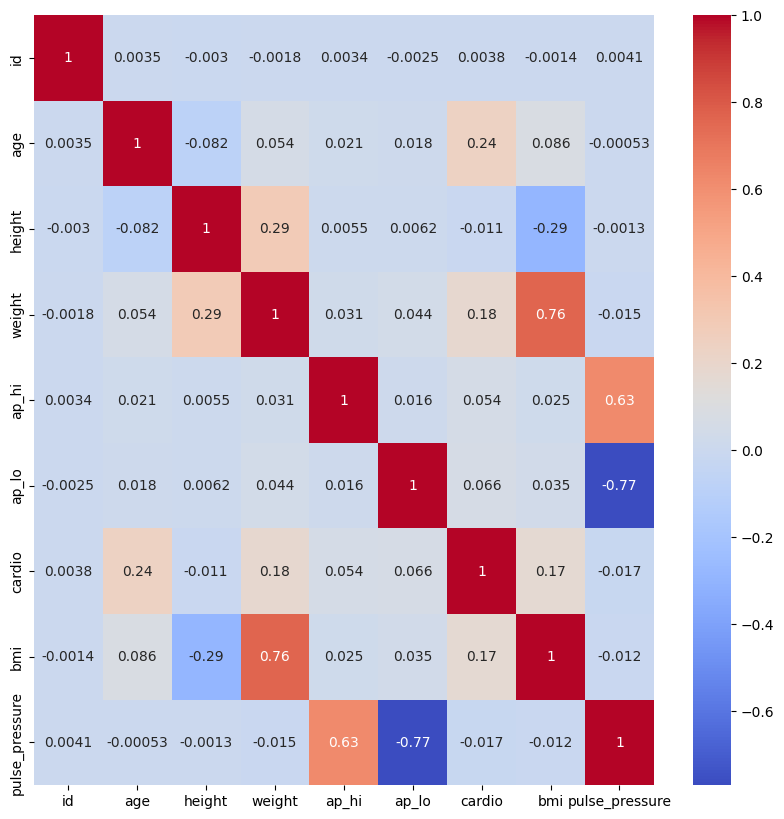

In [ ]:
df_

In [ ]:
# Assuming 'df' is your DataFrame after feature engineering (including 'bmi', 'age_years', 'age_group', 'blood_pressure_category')

# --- 1. Prepare the DataFrame for VIF calculation ---
# Drop the target variable and the 'id' column as they are not features for VIF
features_df = df.drop(columns=['id', 'cardio'])

# --- 2. Apply One-Hot Encoding using pd.get_dummies() ---
# get_dummies will convert all 'object' (string) columns and by default,
# also any numerical columns that look categorical (e.g., gender, cholesterol, gluc, smoke, alco, active).
# It's good practice to explicitly specify columns if you have mixed types that get_dummies might misinterpret.

# Identify columns to get_dummies for (string/object dtypes and known integer-encoded categoricals)
# You need to ensure 'gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active' are either object dtype
# or explicitly passed to get_dummies if they are still int and you want them dummified.
# If they are already int (0,1,2,3), get_dummies might treat them as numerical unless specified.

# Let's assume the columns we identified as categorical previously are:
explicit_categorical_cols = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'age_group', 'blood_pressure_category']

# Convert integer-encoded categorical columns to 'object' dtype first if they aren't already,
# to ensure get_dummies treats them as discrete categories.
for col in explicit_categorical_cols:
    if col in features_df.columns:
        features_df[col] = features_df[col].astype('object')

# Apply get_dummies to all categorical columns (now correctly typed as 'object')
# and other columns that get_dummies might pick up.
# drop_first=True helps mitigate perfect multicollinearity in the dummy variables themselves.
features_dummy_encoded = pd.get_dummies(features_df, columns=explicit_categorical_cols, drop_first=True)

print(f"Shape of features after dummy encoding: {features_dummy_encoded.shape}")
print("\nFirst 5 rows of dummy-encoded features:")
print(features_dummy_encoded.head())

# --- 3. Add a Constant (Intercept) to the DataFrame ---
# VIF calculation usually requires an intercept term.
X_vif = add_constant(features_dummy_encoded)

# --- 4. Calculate VIF for each feature ---
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Sort by VIF in descending order for easier inspection
vif_data = vif_data.sort_values(by="VIF", ascending=False)

print("\nVariance Inflation Factor (VIF) for all features:")
print(vif_data)

# --- IMPORTANT NOTES ---
# 1. This VIF calculation is performed on the *entire* dataset. In a proper ML workflow,
#    you should calculate VIF *only on the training set (X_train_processed)* after it
#    has gone through your ColumnTransformer and Pipeline. This prevents data leakage.
# 2. pd.get_dummies() vs. OneHotEncoder: While convenient, for a production-ready pipeline,
#    OneHotEncoder (especially within a ColumnTransformer) is generally preferred as it
#    integrates better with the sklearn ecosystem, handles unseen categories, and fits
#    into a consistent transformation pipeline.
# 3. High VIF values (e.g., >5 or >10) indicate potential multicollinearity. You would
#    then decide whether to address it (e.g., by removing one of the correlated features,
#    combining them, or using regularization techniques) based on your goals
#    (interpretability vs. pure prediction).